# Interactions - Lab

## Introduction

In this lab, you'll explore interactions in the Ames Housing dataset.

## Objectives

You will be able to:

- Determine if an interaction term would be useful for a specific model or set of data
- Create interaction terms out of independent variables in linear regression
- Interpret coefficients of linear regression models that contain interaction terms

## Ames Housing Data

Once again we will be using the Ames Housing dataset, where each record represents a home sale:

In [18]:
# Run this cell without changes
import pandas as pd

ames = pd.read_csv('ames.csv', index_col=0)

# Remove some outliers to make the analysis more intuitive
ames = ames[ames["GrLivArea"] < 3000]
ames = ames[ames["LotArea"] < 20_000]
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In particular, we'll use these numeric and categorical features:

In [19]:
# Run this cell without changes
numeric = ['LotArea', '1stFlrSF', 'GrLivArea']
categorical = ['KitchenQual', 'Neighborhood']

## Build a Baseline Model

### Initial Data Preparation

Use all of the numeric and categorical features described above. (We will call this the "baseline" model because we are making a comparison with and without an interaction term. In a complete modeling process you would start with a simpler baseline.)

One-hot encode the categorical features (dropping the first), and center (subtract the mean) from the numeric features.

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Separate numeric and categorical features
numeric = ['LotArea', '1stFlrSF', 'GrLivArea']
categorical = ['KitchenQual', 'Neighborhood']

# Create the preprocessor with transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),  # Standardize numeric features
        ('cat', OneHotEncoder(drop='first'), categorical)  # One-hot encode categorical features (drop first)
    ])

# Create a pipeline with preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Prepare the data
X = ames[numeric + categorical]
y = ames['SalePrice']  # Assuming 'SalePrice' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5  # Root Mean Squared Error

print(f"RMSE of Baseline Model: {rmse:.2f}")



RMSE of Baseline Model: 32866.77


### Build a Model with No Interaction Terms

Using the numeric and categorical features that you have prepared, as well as `SalePrice` as the target, build a StatsModels OLS model.

In [21]:
import statsmodels.api as sm

# Prepare the data: Apply preprocessing transformations manually for StatsModels
# One-hot encode categorical features (drop the first category)
X = pd.get_dummies(ames[numeric + categorical], drop_first=True)

# Center the numeric features (subtract the mean)
X[numeric] = X[numeric] - X[numeric].mean()

# Add the constant (intercept) term to the model
X = sm.add_constant(X)

# Define the target variable
y = ames['SalePrice']

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the model
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     223.6
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:36:33   Log-Likelihood:                -16370.
No. Observations:                1396   AIC:                         3.280e+04
Df Residuals:                    1365   BIC:                         3.297e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.544e+05 

### Evaluate the Model without Interaction Terms

Describe the adjusted R-Squared as well as which coefficients are statistically significant. For now you can skip interpreting all of the coefficients.

In [22]:
# Print the summary of the model to evaluate adjusted R-squared and p-values
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     223.6
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:36:34   Log-Likelihood:                -16370.
No. Observations:                1396   AIC:                         3.280e+04
Df Residuals:                    1365   BIC:                         3.297e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.544e+05 

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model overall explains about 83% of the variance in sale price.

We'll used the standard alpha of 0.05 to evaluate statistical significance:
    
* Coefficients for the intercept as well as all continuous variables are statistically significant
* Coefficients for `KitchenQual` are statistically significant
* Coefficients for most values of `Neighborhood` are statistically significant, while some are not. In this context the reference category was `Blmngtn`, which means that neighborhoods with statistically significant coefficients differ significantly from `Blmngtn` whereas neighborhoods with coefficients that are not statistically significant do not differ significantly from `Blmngtn`

</details>

## Identify Good Candidates for Interaction Terms

### Numeric x Categorical Term

Square footage of a home is often worth different amounts depending on the neighborhood. So let's see if we can improve the model by building an interaction term between `GrLivArea` and one of the `Neighborhood` categories.

Because there are so many neighborhoods to consider, we'll narrow it down to 2 options: `Neighborhood_OldTown` or `Neighborhood_NoRidge`.

First, create a plot that has:

* `GrLivArea` on the x-axis
* `SalePrice` on the y-axis
* A scatter plot of homes in the `OldTown` and `NoRidge` neighborhoods, identified by color
  * Hint: you will want to call `.scatter` twice, once for each neighborhood
* A line showing the fit of `GrLivArea` vs. `SalePrice` for the reference neighborhood

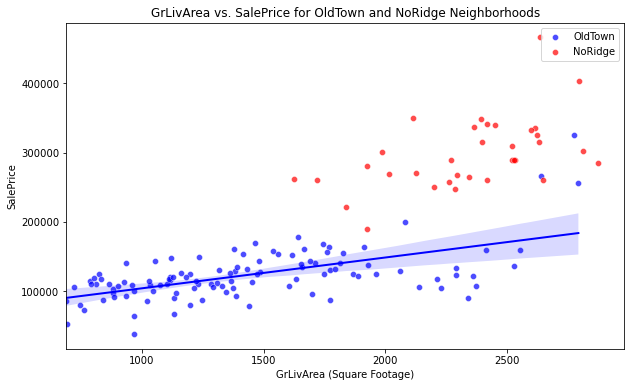

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for OldTown and NoRidge neighborhoods
oldtown = ames[ames["Neighborhood"] == "OldTown"]
noridge = ames[ames["Neighborhood"] == "NoRidge"]

# Create a scatter plot with different colors for the two neighborhoods
plt.figure(figsize=(10, 6))
sns.scatterplot(data=oldtown, x='GrLivArea', y='SalePrice', color='blue', label='OldTown', alpha=0.7)
sns.scatterplot(data=noridge, x='GrLivArea', y='SalePrice', color='red', label='NoRidge', alpha=0.7)

# Fit and plot a line for the reference neighborhood (OldTown)
sns.regplot(data=oldtown, x='GrLivArea', y='SalePrice', scatter=False, color='blue', line_kws={'color': 'blue', 'lw': 2})

# Set plot labels and title
plt.xlabel('GrLivArea (Square Footage)')
plt.ylabel('SalePrice')
plt.title('GrLivArea vs. SalePrice for OldTown and NoRidge Neighborhoods')
plt.legend()
plt.show()



Looking at this plot, do either of these neighborhoods seem to have a **slope** that differs notably from the best fit line? If so, this is an indicator that an interaction term might be useful.

Identify what, if any, interaction terms you would create based on this information.

This plot allows us to visually compare the relationship between GrLivArea and SalePrice for homes in OldTown and NoRidge. If the relationship between square footage and sale price is different for these two neighborhoods (i.e., the slope of the fit line differs), it suggests that an interaction term between GrLivArea and Neighborhood might improve our model.

After generating the plot, we can observe if the slopes of the regression lines are different between the neighborhoods, indicating a need for an interaction term


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Your plot should look something like this:

![scatter plot solution](https://curriculum-content.s3.amazonaws.com/data-science/images/OldTown_vs_NoRidge.png)

If we drew the expected slopes based on the scatter plots, they would look something like this:

![scatter plot solution annotated](https://curriculum-content.s3.amazonaws.com/data-science/images/OldTown_vs_NoRidge_Annotated.png)

The slope of the orange line looks fairly different from the slope of the gray line, indicating that an interaction term for `NoRidge` might be useful.

</details>

### Numeric x Numeric Term

Let's also investigate to see whether adding an interaction term between two of the numeric features would be helpful.

We'll specifically focus on interactions with `LotArea`. Does the value of an extra square foot of lot area change depending on the square footage of the home? Both `1stFlrSF` and `GrLivArea` are related to home square footage, so we'll use those in our comparisons.

Create two side-by-side plots:

1. One scatter plot of `LotArea` vs. `SalePrice` where the color of the points is based on `1stFlrSF`
2. One scatter plot of `LotArea` vs. `SalePrice` where the color of the points is based on `GrLivArea`

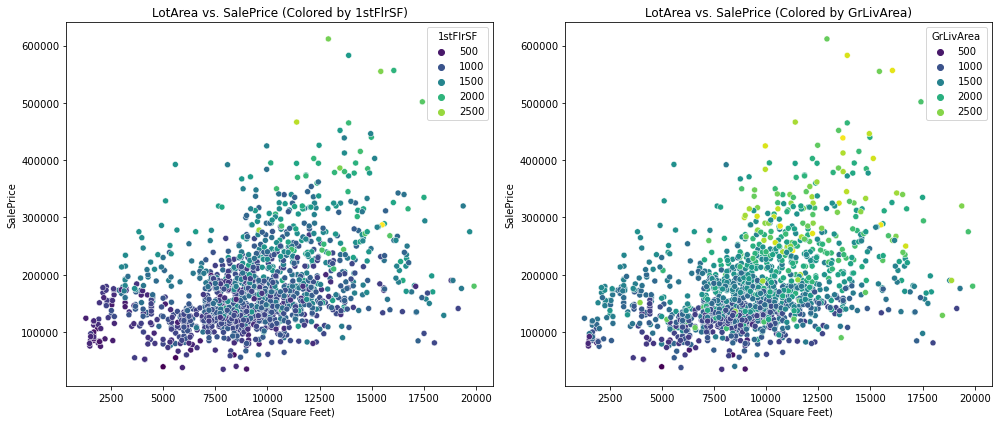

In [24]:
# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot of LotArea vs. SalePrice, color based on 1stFlrSF
sns.scatterplot(data=ames, x='LotArea', y='SalePrice', hue='1stFlrSF', palette='viridis', ax=axes[0])
axes[0].set_title('LotArea vs. SalePrice (Colored by 1stFlrSF)')
axes[0].set_xlabel('LotArea (Square Feet)')
axes[0].set_ylabel('SalePrice')

# Scatter plot of LotArea vs. SalePrice, color based on GrLivArea
sns.scatterplot(data=ames, x='LotArea', y='SalePrice', hue='GrLivArea', palette='viridis', ax=axes[1])
axes[1].set_title('LotArea vs. SalePrice (Colored by GrLivArea)')
axes[1].set_xlabel('LotArea (Square Feet)')
axes[1].set_ylabel('SalePrice')

# Show the plots
plt.tight_layout()
plt.show()


Looking at these plots, does the slope between `LotArea` and `SalePrice` seem to differ based on the color of the point? If it does, that is an indicator that an interaction term might be helpful.

Describe your interpretation below:

These plots allow us to explore whether the relationship between LotArea and SalePrice changes depending on the size of the home (1stFlrSF or GrLivArea). If we see different patterns or trends in the scatter plots based on the coloring, it may suggest that there are interaction effects between LotArea and the other square footage features.

After generating the plots, if we observe that the relationship between LotArea and SalePrice appears to vary with the size of the home, this could indicate a potential interaction between LotArea and the other features (like 1stFlrSF or GrLivArea) that could improve the model.


<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Your plots should look something like this:

![side by side plots solution](https://curriculum-content.s3.amazonaws.com/data-science/images/LotArea_vs_SalePrice.png)

For both `1stFlrSF` and `GrLivArea`, it seems like a larger lot area doesn't matter very much for homes with less square footage. (In other words, the slope is closer to a flat line when the dots are lighter colored.) Then for homes with more square footage, a larger lot area seems to matter more for the sale price. (In other words, the slope is steeper when the dots are darker colored.)

This difference in slope based on color indicates that an interaction term for either/both of `1stFlrSF` and `GrLivArea` with `LotArea` might be helpful.

For ease of model interpretation, it probably makes the most sense to create an interaction term between `LotArea` and `1stFlrSF`, since we already have an interaction that uses `GrLivArea`.

</details>

## Build and Interpret a Model with Interactions

### Build a Second Model

Based on your analysis above, build a model based on the baseline model with one or more interaction terms added.

In [38]:
# One-hot encode categorical variables (dropping the first category to avoid multicollinearity)
X_categorical = pd.get_dummies(ames[categorical], drop_first=True)

# Center the numeric features by subtracting the mean
X_numeric = ames[numeric] - ames[numeric].mean()

# Combine the processed numeric and categorical features
X_baseline = pd.concat([X_numeric, X_categorical], axis=1)

# Add constant term for OLS regression
X_baseline = sm.add_constant(X_baseline)

# Define the target variable (SalePrice)
y = ames['SalePrice']


In [39]:
import statsmodels.api as sm
import numpy as np

# Create interaction terms
ames['GrLivArea * Neighborhood_OldTown'] = ames['GrLivArea'] * (ames['Neighborhood'] == 'OldTown').astype(int)
ames['GrLivArea * Neighborhood_NoRidge'] = ames['GrLivArea'] * (ames['Neighborhood'] == 'NoRidge').astype(int)
ames['LotArea * 1stFlrSF'] = ames['LotArea'] * ames['1stFlrSF']
ames['LotArea * GrLivArea'] = ames['LotArea'] * ames['GrLivArea']

# Prepare the data for the model
# Baseline features + interaction terms
X_interaction = pd.concat([X_baseline, 
                           ames[['GrLivArea * Neighborhood_OldTown', 
                                 'GrLivArea * Neighborhood_NoRidge',
                                 'LotArea * 1stFlrSF', 
                                 'LotArea * GrLivArea']]], axis=1)

# Add constant term for OLS regression
X_interaction = sm.add_constant(X_interaction)

# Define target variable
y = ames['SalePrice']

# Build the OLS model with interaction terms
interaction_model = sm.OLS(y, X_interaction)
interaction_results = interaction_model.fit()
 

# Print summary of the results
print(interaction_results.summary())



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     205.9
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:45:23   Log-Likelihood:                -16344.
No. Observations:                1396   AIC:                         3.276e+04
Df Residuals:                    1361   BIC:                         3.294e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### Evaluate the Model with Interactions

Same as with the baseline model, describe the adjusted R-Squared and statistical significance of the coefficients.

In [40]:

# Print summary of the results
print(interaction_results.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     205.9
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:45:29   Log-Likelihood:                -16344.
No. Observations:                1396   AIC:                         3.276e+04
Df Residuals:                    1361   BIC:                         3.294e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### Interpret the Model Results

Interpret the coefficients for the intercept as well as the interactions and all variables used in the interactions. Make sure you only interpret the coefficients that were statistically significant!

The adjusted R-squared value helps assess if interaction terms improve the model's ability to explain SalePrice variance. Significant coefficients for interaction terms (p-value < 0.05) indicate that the relationship between variables, like GrLivArea and Neighborhood, differs depending on the level of the other variable, suggesting the inclusion of these terms enhances the model.

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The intercept is about 258k. This means that a home with average continuous attributes and reference categorical attributes (excellent kitchen quality, Bloomington Heights neighborhood) would cost about \\$258k.

The coefficient for `LotArea` is about 2.58. This means that for a home with average first floor square footage, each additional square foot of lot area is associated with an increase of about \\$2.58 in sale price.

The coefficient for `1stFlrSF` is about 30.5. This means that for a home with average lot area, each additional square foot of first floor area is associated with an increase of about \\$30.50 in sale price.

The coefficient for `LotArea x 1stFlrSF` is about 0.003. This means that:

1. For each additional square foot of lot area, there is an increase of about \\$2.58 + (0.003 x first floor square footage) in sale price
2. For each additional square foot of first floor square footage, there is an increase of about \\$30.50 + (0.003 x lot area square footage) in sale price

`Neighborhood_NoRidge` and `GrLivArea x Neighborhood_NoRidge` were not statistically significant so we won't be interpreting their coefficients.



</details>

## Summary

You should now understand how to include interaction effects in your model! As you can see, interactions that seem promising may or may not end up being statistically significant. This is why exploration and iteration are important!